## Loading dependencies and necessary data:

In [1]:
import oursin as urchin
urchin.setup()
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
import pandas as pd
%matplotlib widget

(URN) connected to server
Login sent with ID: 5f34016c, copy this ID into the renderer to connect.


In [2]:
from pathlib import Path
dpath = Path(r'../../data/')
st_samp = np.squeeze(np.load(dpath / 'spike_times.npy'))
sc = np.squeeze(np.load(dpath / 'spike_clusters.npy')) 
event_start = np.squeeze(np.load("../../data/natImsOnTimes.npy"))
event_ids = np.squeeze(np.load("../../data/natImsIDs.npy") )
# pulling in location data
locations = pd.read_csv(dpath/"li_location_colors_log.csv")

## Using new graphing object for purely python end:

In [3]:
# Creating graph object
neuron_graph = urchin.ui.interactive_plot()

In [4]:
# Attatching data
neuron_graph.avg_and_bin(st_samp, sc, event_start, event_ids, window_start_sec=0.1, event_duration_sec = 0.3, window_end_sec=0.2, sample= True)
neuron_graph.avg_data = np.delete(neuron_graph.avg_data, 88, axis=0) #This line is specific for this dataset

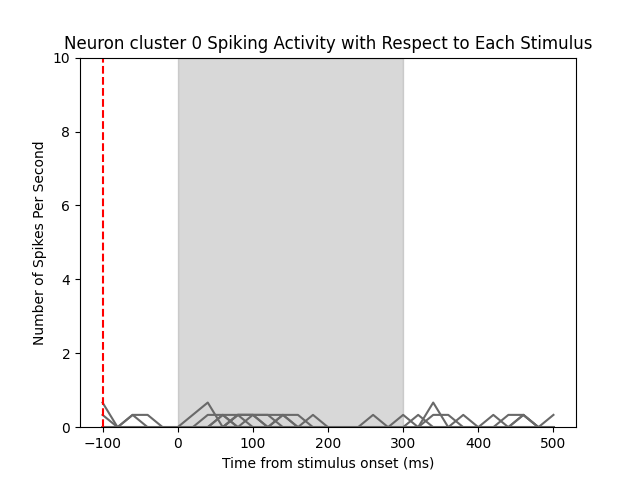

In [ ]:
# Plotting graph
neuron_graph.plot_neuron_view_interactive_graph()
# for this dataset, start by checking out neuron 354 to see interesting data

## Displaying brain:

In [ ]:
urchin.ccf25.load()

In [ ]:
urchin.ccf25.grey.set_visibility(True)
urchin.ccf25.grey.set_material('transparent-unlit')
urchin.ccf25.grey.set_color([0,0,0])
urchin.ccf25.grey.set_alpha(0.1)
area_list = urchin.ccf25.get_areas(["VISp", "PTLp", "VISam", "VISpm"])
urchin.ccf25.set_visibilities(area_list, True)
urchin.ccf25.set_materials(area_list,'transparent-unlit')
urchin.ccf25.set_colors(area_list,[[0,0,0],[0,0,0],[0,0,0],[0,0,0]])
urchin.ccf25.set_alphas(area_list,0.2)

## Creating neurons:

In [ ]:
neuron_graph.neurons = urchin.meshes.create(len(locations))

In [ ]:
#Setting positions (static):
positions_list = []

for i, row in locations.iterrows():
    position = [round(row.left_right_ccf_coord inate), round(row.anterior_posterior_ccf_coordinate), round(row.dorsal_ventral_ccf_coordinate)]
    positions_list.append(position)

# urchin.ui.neuron_colors = list(locations["color"])

In [ ]:
neuron_graph.neuron_colors = list(locations["color"])
neuron_graph.neuron_colors = [urchin.utils.hex_to_rgb(x) for x in neuron_graph.neuron_colors]

In [ ]:
urchin.meshes.set_positions(neuron_graph.neurons, positions_list)
urchin.meshes.set_scales(neuron_graph.neurons, [[0.05,0.05,0.05]]* len(neuron_graph.neurons))
urchin.meshes.set_colors(neuron_graph.neurons, neuron_graph.neuron_colors)

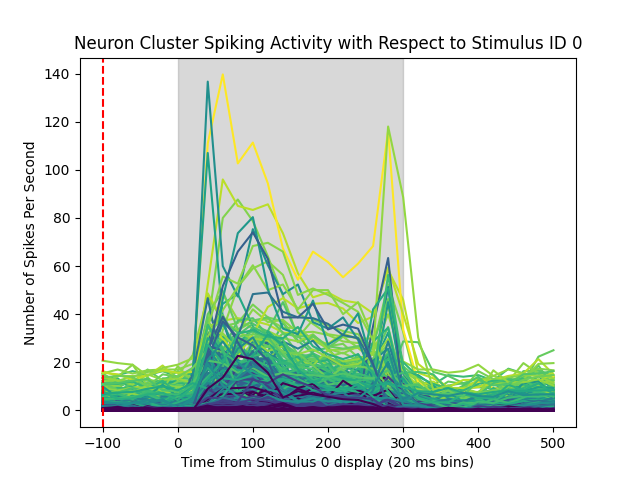

In [ ]:
neuron_graph.plot_stim_view_interactive_graph()


In [ ]:
@urchin.client.sio.on('pinpoint-move-callback')

In [ ]:
# stims = [0,1]
# final_avg = np.empty((neuron_graph.binned_spikes.shape[0], len(stims), 31))
# for neuron_id in range(neuron_graph.binned_spikes.shape[0]):
#             for stim_id in stims:
#                 stim_indices = np.where(int(event_ids[0]) == stim_id)[0]
#                 print("stim idx grabbed")
#                 print(stim_indices)

#                 neuron_stim_data = np.empty((len(stim_indices), 31))
#                 print("neuron stim data empty created")
#                 print(neuron_stim_data)
#                 for i, stim_idx in enumerate(stims):
#                     print("entering for loop")
#                     bin_id = int(neuron_graph.stim_binned[0][stim_idx])
                    
#                     # Get selected columns
#                     selected_columns = neuron_graph.binned_spikes[neuron_id, bin_id - 10: bin_id + 10]
#                     print('selected columns grabbed yay')
                    
#                     # Check if selected_columns is empty
#                     if selected_columns.size == 0:
#                         print(f"Empty selected_columns for neuron {neuron_id}, stim {stim_id}, stim_idx {stim_idx}")
#                         # selected_columns = np.zeros(21)
                    
#                     # Check if selected_columns can be reshaped to match neuron_stim_data's row shape
#                     if selected_columns.shape[0] != 30:
#                         print(f"selected_columns shape mismatch for neuron {neuron_id}, stim {stim_id}, stim_idx {stim_idx}")
#                         print(selected_columns.shape)
#                         # selected_columns = np.zeros(21)
#                     print("sel col:")
#                     print(selected_columns)
#                     neuron_stim_data[i,:] = selected_columns
#                 print( "neuronstimdata")
#                 print(neuron_stim_data)

#                 # bin_average = np.mean(neuron_stim_data, axis=0) / .02
#                 # final_avg[neuron_id, int(stim_id) - 1, :] = bin_average